# Psychoinformatics - Week 15 (Exercises)
by 李彥廷 (b08207008@ntu.edu.tw)

## 1 Face Detection (4 points)
Please use one face detection method/package of your choice to see if you can detect the faces in the following two pictures:

<img src="https://www.kindpng.com/picc/m/28-286422_smiley-face-clip-art-human-face-cartoon-boy.png" width=20%>
<img src="https://i.imgur.com/zESfT.jpg" width=20%>

If so, why? If not, why not? 

Remember to explore the model parameters to make your conclusions parameter-independent.

In [52]:
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
def face_detection(img_path):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    detector = MTCNN() 
    faces = detector.detect_faces(img) 
    if faces:
        print(faces)
        face = faces[0]['box']
        cv2.rectangle(img,(face[0],face[1]),(face[0]+face[2],face[1]+face[3]),[255,0,0],5)

        left_eye = faces[0]['keypoints']['left_eye']
        right_eye = faces[0]['keypoints']['right_eye']
        nose = faces[0]['keypoints']['nose']
        mouth_l = faces[0]['keypoints']['mouth_left']
        mouth_r = faces[0]['keypoints']['mouth_right']

        cv2.circle(img, left_eye, 1,(0, 255, 0), 10)
        cv2.circle(img, right_eye, 1,(0, 255, 0), 10)
        cv2.circle(img, nose, 1,[255,0,0], 10)
        cv2.circle(img, mouth_l, 1,[0,0,255], 10)
        cv2.circle(img, mouth_r, 1,[0,0,255], 10)
    plt.imshow(img)

[{'box': [571, 129, 245, 306], 'confidence': 0.9643441438674927, 'keypoints': {'left_eye': (684, 240), 'right_eye': (792, 246), 'nose': (764, 295), 'mouth_left': (696, 363), 'mouth_right': (779, 368)}}, {'box': [707, 403, 128, 150], 'confidence': 0.7194185256958008, 'keypoints': {'left_eye': (764, 462), 'right_eye': (809, 465), 'nose': (796, 499), 'mouth_left': (761, 521), 'mouth_right': (795, 523)}}]


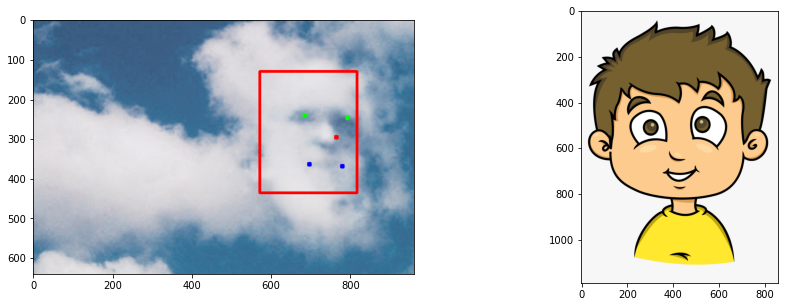

In [93]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1); face_detection('cloud.jpg')
plt.subplot(1,2,2); face_detection('boy.png')

只有在雲的臉有偵測到臉，卡通圖則沒有偵測到臉。根據mtcnn的預測結果，我想他應該是利用臉的五官來判斷是否為人臉。mtcnn模型在訓練的時候，可能都是以真實的人臉進行訓練。所以在左邊雲的照片中，裡面的五官更接近真實人臉可能呈現的樣子，像是雲擁有較不明確的分界和陰影，這點在一般的照片上很常見，反而在左邊的小男孩上面，可能因為像素之間界線非常分明，某個地方是某個顏色，另外一個地方馬上就換成另外一個顏色，輪廓較明顯。另外，在人的真實照片上根本不會有黑色的contour，膚色或五官也不會是幾乎都是同一種rgb。以這點來思考的話，雲確實比較接近直實的照片可能會有的特徵，旁邊的小男孩反而因為卡通化而失去真實性，我認為這是辨認不出來的原因之一。

## 2 Audio Segementation (4 points) 
Please use one audio/speech segementation method of your choice (including your own codes) to calculate:

[1] the number of segments, and <br>
[2] the total speech duration of all the segments (seconds)

of each .wav file in https://ceiba.ntu.edu.tw/course/4671ea/content/speech.zip .

In the following example, there are 5 segements and the total speech duration is the sum of yellow(+blue) periods.

<img src="https://www.irit.fr/recherches/SAMOVA/assets/images/segmentation3.gif">

In [232]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
import librosa
import librosa.display
import glob
from pydub import AudioSegment

In [377]:
def draw_bound(x, Fs, bounds):
    time = np.arange(0, x.shape[0]/float(Fs), 1.0/Fs)
    plt.plot(time, x)
    for bound in bounds:
        plt.axvline(x=bound[0], color='red')
        plt.axvline(x=bound[1], color='blue')
    plt.show()

[[1.08, 1.72], [2.24, 3.54]]


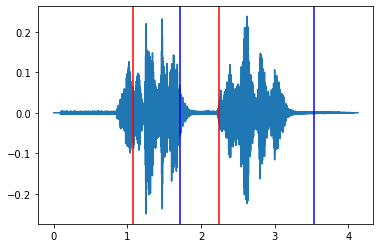

[[0.42, 2.48]]


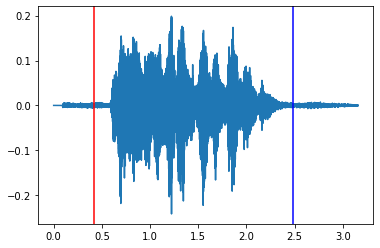

[[0.2, 2.52]]


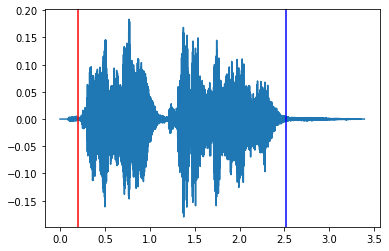

[[0.3, 2.52]]


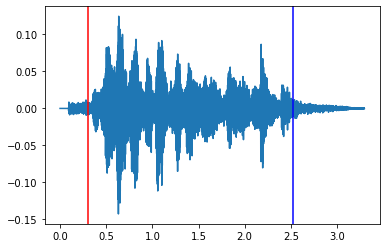

[[0.28, 2.3000000000000003]]


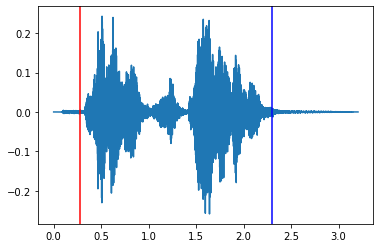

[[0.76, 2.52]]


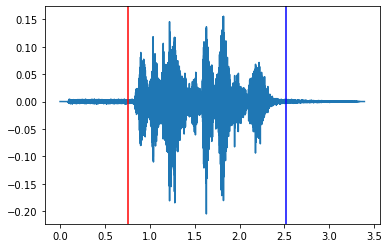

[[1.02, 2.04]]


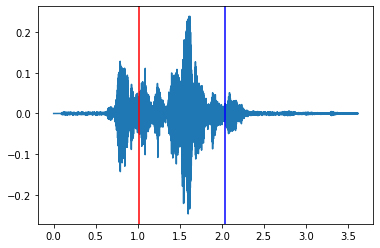

[[0.3, 2.92]]


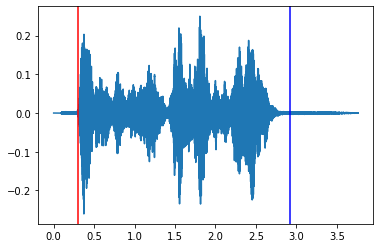

[[0.62, 2.72]]


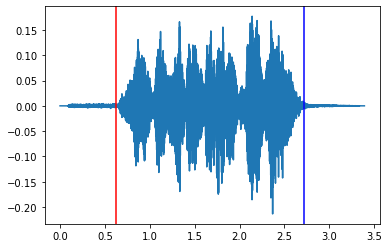

[[0.36, 1.94]]


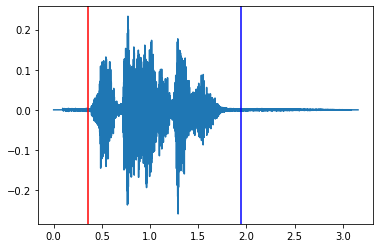

In [389]:
angerfile = glob.glob("speech/anger/*wav")


angerSegmentCount  = 0
angerDuration = 0
for file in angerfile:
    y, sr = librosa.load(file,sr=None,mono=True)
    segments = aS.silence_removal(y, sr, 0.02, 0.02, 0.8, 0.40)
    print(segments)
    angerSegmentCount += len(segments)
    for bound in segments:
        angerDuration += bound[1] - bound[0]
    draw_bound(y, sr, segments)

In [391]:
print("Number of segments in Anger: ", angerSegmentCount)
print("Speech Durations in Anger: ",angerDuration)

Number of segments in Anger:  11
Speech Durations in Anger:  19.64


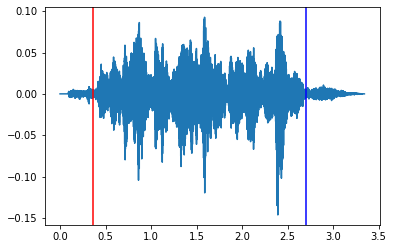

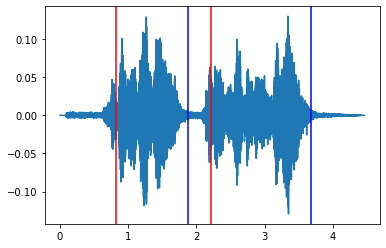

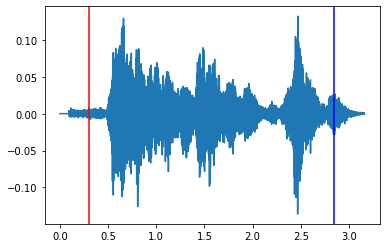

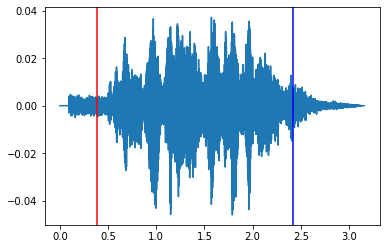

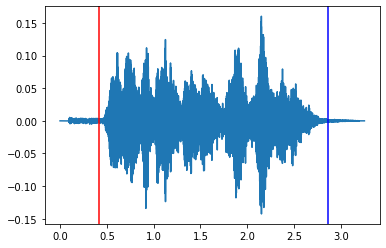

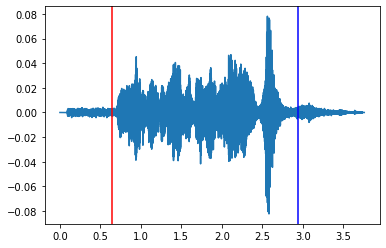

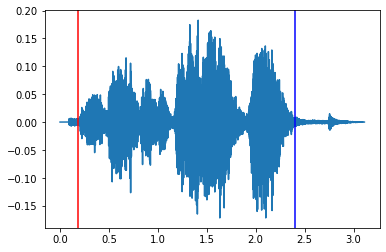

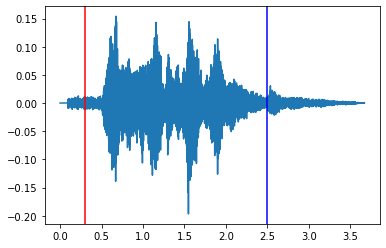

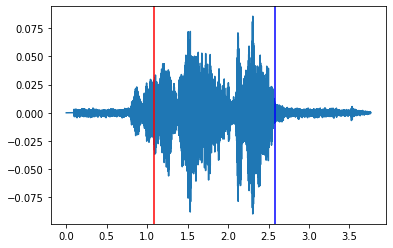

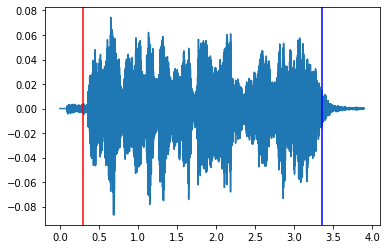

In [373]:
happyfile = glob.glob("speech/happy/*wav")
happySegmentCount  = 0
happyDuration = 0

for file in happyfile:
    y, sr = librosa.load(file,sr=None,mono=True)
    segments = aS.silence_removal(y, sr, 0.02, 0.02, 0.7, 0.4)
    happySegmentCount += len(segments)
    for bound in segments:
        happyDuration += bound[1] - bound[0]
    draw_bound(y, sr, segments)

In [371]:
print("Number of segments in Happy: ", happySegmentCount)
print("Speech durations in Happy: ",happyDuration)

Number of segments in Happy:  11
Number of Durations in Happy:  23.32
